### Aim : We aim to segment individuals based on lifestyle and health-related features to identify behavioral clusters, using unsupervised learning.

### Loading required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [3]:
# Load data
df = pd.read_csv("../../data/processed/clustering_preprocessing_robust_scaled.csv")
print(df.shape)
df.head()

(2078, 19)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-1.0,-0.305183,-0.587756,-0.458016,0.0,-1.0,-0.39728,0.000000,0.0,0.0,0.000000,0.0,-0.644237,0.369134,-1.0,0.0,0.0,0.0,0.0
1,-1.0,-0.305183,-1.306126,-0.648137,0.0,-1.0,0.60272,0.000000,0.0,1.0,1.139397,1.0,1.288474,-0.630866,0.0,0.0,0.0,0.0,0.0
2,0.0,0.023948,0.705310,-0.149071,0.0,-1.0,-0.39728,0.000000,0.0,0.0,0.000000,0.0,0.644237,0.369134,1.0,0.0,0.0,0.0,0.0
3,0.0,0.682209,0.705310,0.088580,-1.0,-1.0,0.60272,0.000000,0.0,0.0,0.000000,0.0,0.644237,-0.630866,1.0,0.0,0.0,-1.0,1.0
4,0.0,-0.140618,0.561636,0.155122,-1.0,-1.0,-0.39728,-6.725583,0.0,0.0,0.000000,0.0,-0.644237,-0.630866,0.0,0.0,0.0,0.0,0.0


In [4]:
# ------------------ KMeans Analysis ------------------ #
def run_kmeans(df, k_range=range(2, 11)):
    results = []
    best_score = -1
    best_k = None
    best_labels = None

    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42)
        labels = km.fit_predict(df)
        score = silhouette_score(df, labels)
        results.append((k, score))
        print(f"k={k} | Silhouette Score = {score:.4f}")
        if score > best_score:
            best_score = score
            best_k = k
            best_labels = labels

    return results, best_k, best_labels

In [5]:
def plot_silhouette_scores(results):
    k_vals, scores = zip(*results)
    plt.plot(k_vals, scores, marker='o')
    plt.title("KMeans: Silhouette Scores by Cluster Count")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()

In [6]:
def evaluate_clustering(X, labels, name="Clustering"):
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    print(f"\n--- {name} ---")
    print(f"Silhouette Score:         {sil:.4f}")
    print(f"Calinski-Harabasz Index:  {ch:.2f}")
    print(f"Davies-Bouldin Index:     {db:.2f}")
    return sil, ch, db

### Model training and evaluation

k=2 | Silhouette Score = 0.5037
k=3 | Silhouette Score = 0.2514
k=4 | Silhouette Score = 0.2240
k=5 | Silhouette Score = 0.2047
k=6 | Silhouette Score = 0.2054
k=7 | Silhouette Score = 0.2096
k=8 | Silhouette Score = 0.2161
k=9 | Silhouette Score = 0.1922
k=10 | Silhouette Score = 0.1748


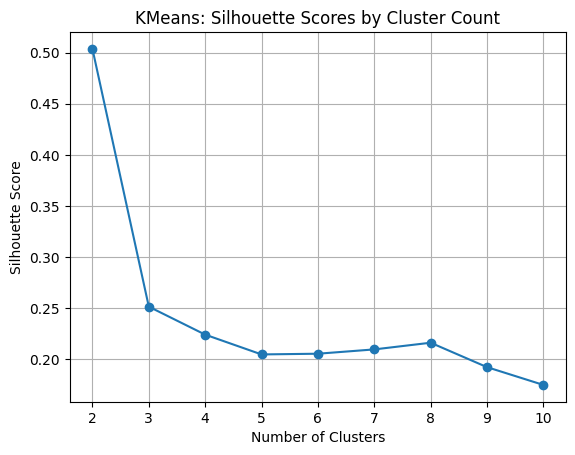


--- KMeans (k=2) ---
Silhouette Score:         0.5037
Calinski-Harabasz Index:  1947.96
Davies-Bouldin Index:     0.80


In [7]:
# Run KMeans
kmeans_scores, best_k, labels_kmeans = run_kmeans(df)
plot_silhouette_scores(kmeans_scores)
kmeans_metrics = evaluate_clustering(df, labels_kmeans, name=f"KMeans (k={best_k})")

#### Interpretation of Silhouette Scores by Cluster Count
The plot above shows the Silhouette Scores for KMeans clustering with the number of clusters ranging from 2 to 10.

The highest Silhouette Score is observed at k = 2, indicating that partitioning the data into 2 clusters produces the most well-defined and cohesive clusters according to this metric.

Beyond k = 2, the Silhouette Score sharply decreases and remains relatively low and stable, suggesting that increasing the number of clusters does not improve cluster quality.

This trend suggests that 2 clusters is the optimal choice for this dataset based on the Silhouette Score.

Therefore, for further analysis and interpretation, it is reasonable to proceed with k = 2 clusters in the KMeans algorithm.

In [8]:
# Run Hierarchical
hierarchical = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels_hier = hierarchical.fit_predict(df)
hierarchical_metrics = evaluate_clustering(df, labels_hier, name=f"Hierarchical (k={best_k})")


--- Hierarchical (k=2) ---
Silhouette Score:         0.4908
Calinski-Harabasz Index:  1888.59
Davies-Bouldin Index:     0.84


### Clustering Results (k=2)

| Metric                  | KMeans  | Hierarchical |
|-------------------------|---------|--------------|
| Silhouette Score        | 0.5037  | 0.4908       |
| Calinski-Harabasz Index | 1947.96 | 1888.59      |
| Davies-Bouldin Index    | 0.80    | 0.84         |

- KMeans has slightly better scores across all metrics.
- Silhouette and Calinski-Harabasz scores are higher for KMeans, meaning clusters are tighter and better separated.
- Davies-Bouldin is lower for KMeans, which is also better.
- Both methods work okay, but KMeans is a bit better for this dataset with 2 clusters.

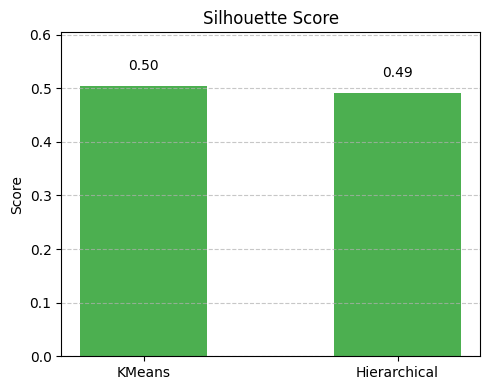

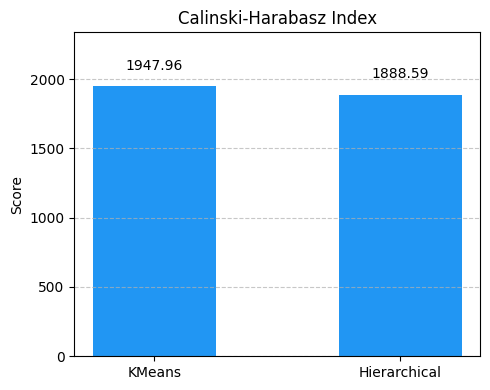

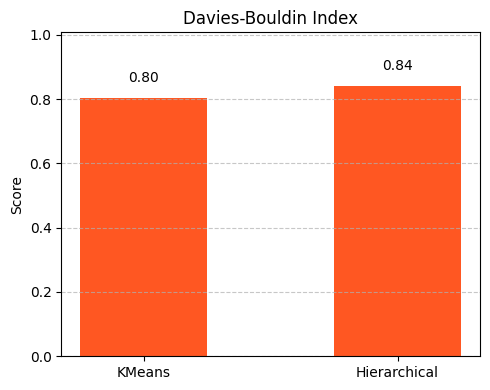

In [9]:
# ------------------ Metric Comparison Bar Charts ------------------ #
models = ['KMeans', 'Hierarchical']
metrics = ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index']
colors = ['#4CAF50', '#2196F3', '#FF5722']


all_metrics = list(zip(kmeans_metrics, hierarchical_metrics))

for i, metric_name in enumerate(metrics):
    values = [all_metrics[i][0], all_metrics[i][1]]
    
    plt.figure(figsize=(5, 4))
    bars = plt.bar(models, values, color=colors[i], width=0.5)
    plt.ylim(0, max(values) * 1.2)
    plt.title(metric_name)
    plt.ylabel('Score')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * max(values), f'{yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

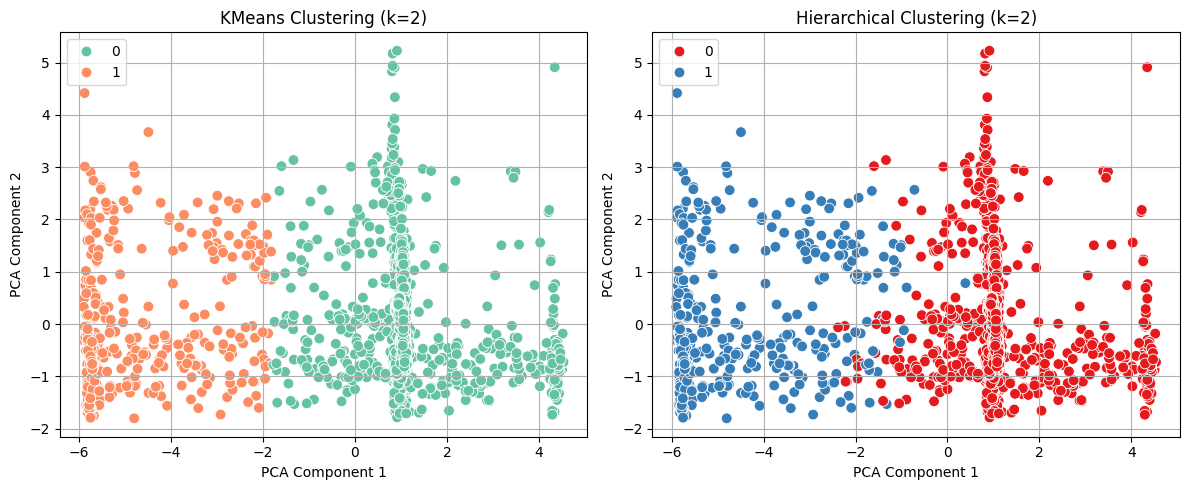

In [10]:
# ------------------ PCA Visualization ------------------ #
pca = PCA(n_components=2)
components = pca.fit_transform(df)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels_kmeans, palette='Set2', s=60, ax=axs[0])
axs[0].set_title(f"KMeans Clustering (k={best_k})")
axs[0].set_xlabel("PCA Component 1")
axs[0].set_ylabel("PCA Component 2")
axs[0].grid(True)

sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels_hier, palette='Set1', s=60, ax=axs[1])
axs[1].set_title(f"Hierarchical Clustering (k={best_k})")
axs[1].set_xlabel("PCA Component 1")
axs[1].set_ylabel("PCA Component 2")
axs[1].grid(True)

plt.tight_layout()
plt.show()

### PCA Scatter Plots of Clustering Results (k=2)

The scatter plots above visualize the clustering results from KMeans (left) and Hierarchical (right) algorithms after projecting the data onto the first two principal components.

- Each point represents an individual, colored by their cluster assignment.
- The KMeans clusters appear more horizontally separated along PCA Component 1.
- The Hierarchical clusters show a different pattern, with clusters overlapping more and a distinct grouping visible along PCA Component 2.
- This highlights how each algorithm captures different aspects of the data structure and groups individuals differently.
- Such visualizations help to interpret and compare clustering results beyond numerical metrics.

Overall, the plots confirm that both methods identify two clusters but partition the data differently in feature space.

In [11]:

# Add cluster labels to the dataframe
df['Cluster_KMeans'] = labels_kmeans

# Get summary statistics for each cluster
cluster_summary = df.groupby('Cluster_KMeans').mean()  # or use median()

cluster_summary

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Cluster_KMeans,,,,,,,,,,,,,,,,,,,
0,-0.482036,0.230407,0.077872,0.141089,-0.161677,-0.116766,0.036855,0.152487,0.150898,0.021557,0.033685,0.044910,0.029131,0.034253,-0.234132,0.004192,0.005389,-0.255689,0.026347
1,-0.549020,0.327168,-0.275725,-0.127909,-0.220588,-0.112745,-0.025724,-5.681848,0.122549,0.019608,-0.099027,0.051471,-0.072281,0.026013,-0.416667,0.000000,0.004902,-0.245098,0.024510


In [12]:
df['Cluster_Hierarchical'] = labels_hier
hier_summary = df.groupby('Cluster_Hierarchical').mean()
hier_summary


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster_KMeans
Cluster_Hierarchical,,,,,,,,,,,,,,,,,,,,
0,-0.487273,0.219585,0.077301,0.138669,-0.162424,-0.118788,0.039407,0.177949,0.152727,0.021818,0.037314,0.044848,0.024250,0.036763,-0.233333,0.004242,0.005455,-0.255758,0.026667,0.004242
1,-0.525701,0.364368,-0.257001,-0.106009,-0.214953,-0.105140,-0.032638,-5.507373,0.116822,0.018692,-0.106814,0.051402,-0.048725,0.016722,-0.411215,0.000000,0.004673,-0.245327,0.023364,0.936916


### Comparison of Clusters: KMeans vs Hierarchical

- Both methods identify two clusters with somewhat similar overall patterns:
  - **Cluster 0** groups tend to be younger, taller, and heavier with slightly higher physical activity and meal-related features.
  - **Cluster 1** groups tend to be older, shorter, lighter, and with lower values in some lifestyle features.

- However, the **Hierarchical clusters show a more extreme difference in the number of main meals (NCP)**, where Cluster 1 has a very low average (-5.5) compared to Cluster 0 (~0.18). This suggests Hierarchical clustering separates out individuals with unusually low NCP values more distinctly.

- The **cluster memberships differ**, as seen by the column `Cluster_KMeans` in the Hierarchical summary:
  - Hierarchical Cluster 0 mostly overlaps with KMeans Cluster 0 (mean ~0.004).
  - Hierarchical Cluster 1 mostly overlaps with KMeans Cluster 1 (mean ~0.937).
  - This shows some alignment but also that clusters are not identical.

- Overall, while both methods broadly agree on two main groups, **Hierarchical clustering may be more sensitive to specific features like meal frequency (NCP)**, producing slightly different clusters.

It is valuable to consider both perspectives to understand the dataset structure comprehensively.
